O arquivo já existe localmente. Carregando do cache...


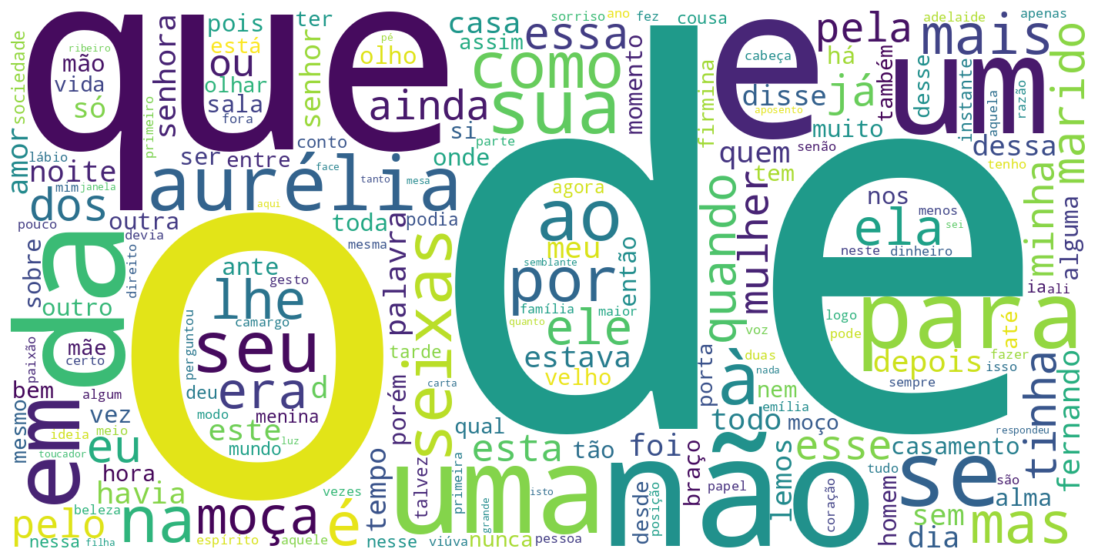

In [ ]:
import requests
import os.path
from collections import Counter
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/divertimentos/Livro-NLP-Python/master/senhora.txt"
nome_arquivo = "senhora.txt"

def baixar_texto(url, nome_arquivo):
    try:
        if os.path.isfile(nome_arquivo):
            print("O arquivo já existe localmente. Carregando do cache...")
            with open(nome_arquivo, "r", encoding="utf-8") as arquivo:
                return arquivo.read()
        else:
            print("Baixando o texto do livro...")
            response = requests.get(url)
            if response.status_code == 200:
                with open(nome_arquivo, "w", encoding="utf-8") as arquivo:
                    arquivo.write(response.text)
                return response.text
            else:
                print("Falha ao baixar o arquivo. Status Code:", response.status_code)
                return None
    except Exception as e:
        print("Ocorreu um erro ao tentar baixar o arquivo:", e)
        return None

def preprocessar_texto(texto):
    texto_processado = texto.translate(str.maketrans('', '', string.punctuation)).lower()
    return texto_processado

texto_livro = baixar_texto(url, nome_arquivo)

if texto_livro:
    texto_normalizado = preprocessar_texto(texto_livro)

    wordcloud = WordCloud(background_color="white", width=1400, height=700, collocations=False).generate(texto_normalizado)

    fig = plt.figure(figsize=(14, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()